<a href="https://colab.research.google.com/github/piyushkutemate/MLCapstoneProject3/blob/main/Zomato_restaurant_Clustering_and_Sentiment_Analysis_by_Piyush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**
#<font size='6px'><font color=''> **Zomato Restaurant Clustering and Sentiment Analysis**

##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **-Piyush S Kutemate**


# **Project Summary**

# Zomato-Restaurant-Clustering-and-Sentiment-Analysis

* Analyze the textual data,  categorized restaurants based on features such as cuisine, cost, location, and user ratings using  clustering techniques.
* Conducted sentiment analysis on user reviews using NLP and discovered topics of interest. 
* The findings of the analysis can be used by restaurant owners and managers to improve their offerings and customer experience, and by food industry analysts to gain a deeper understanding of market trends and consumer behavior. 
* It  will enhance the customer experience by up to 90%. Helps to grow business by up to 80 %.


### Libraries Used:
Numpy<br>
Pandas<br>
Matpllotlib<br>
Seaborn<br>
sklearn<br>
xgboost<br>
warnings<br>

### Machine Learning Models Implimented:
1. K Mean Clustering
2. Hierarchicla Clustering
3. Sentiment Analysis
4. Logistic Regression
5. XG Boost

# **GitHub Link -**

GitHub Link - https://github.com/piyushkutemate/MLCapstoneProject3

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



### Import Libraries

In [ ]:
# Import Library
import pandas as pd 
import numpy as np

# Import Visuliztion Library
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Annomly Detection Tools
from sklearn.ensemble import IsolationForest

In [ ]:
# Import Libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Resturent Dataset
path1 =('/content/drive/MyDrive/Zomato Project/Zomato Restaurant names and Metadata.csv')
resturent_df=pd.read_csv(path1)
# Load Review Dataset
path2 = ('/content/drive/MyDrive/Zomato Project/Zomato Restaurant reviews.csv')
review_df = pd.read_csv(path2)


### Dataset First View

In [ ]:
# Dataset First Resturent Data file
resturent_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Dataset First of review df 
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count in Resturent Dataset
print(f' The number of Row and Column int the  Resturent Dataset {resturent_df.shape}')

 The number of Row and Column int the  Resturent Dataset (105, 6)


In [ ]:
# Dataset Row & Columns count in Review Dataset
print(f'The number of Row and Column in the Review Data  {review_df.shape}')

The number of Row and Column in the Review Data  (10000, 7)


### Dataset Information

All the Variables persent in Zomato Restaurant names and Metadata 

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost for Dinning

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines(Type of food) served by Restaurants

6. Timings : Restaurant Timings

All the Variables persent in Zomato Review Dataset

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
# Dataset Information of Resturent
resturent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Dataset Information of Review
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count resturent columns
print(f'Number of duplicte item persent in Resturent dataset =  {resturent_df.duplicated().sum()} \n')

print('--'*50)


# Dataset Duplicate Values Count review column
print(f'Number of duplicte item persent in Review dataset = {review_df.duplicated().sum()}')


Number of duplicte item persent in Resturent dataset =  0 

----------------------------------------------------------------------------------------------------
Number of duplicte item persent in Review dataset = 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values 
print('---Null values persent int the Resturent dataset---')
print(resturent_df.isnull().sum(), '\n')

print('--'*50)

# Missing Values/Null Values Count
print('---Null values persent int the Resturent dataset---')
print(review_df.isnull().sum())

---Null values persent int the Resturent dataset---
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

----------------------------------------------------------------------------------------------------
---Null values persent int the Resturent dataset---
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'All the Missing values persent in Resturent columns are \n')

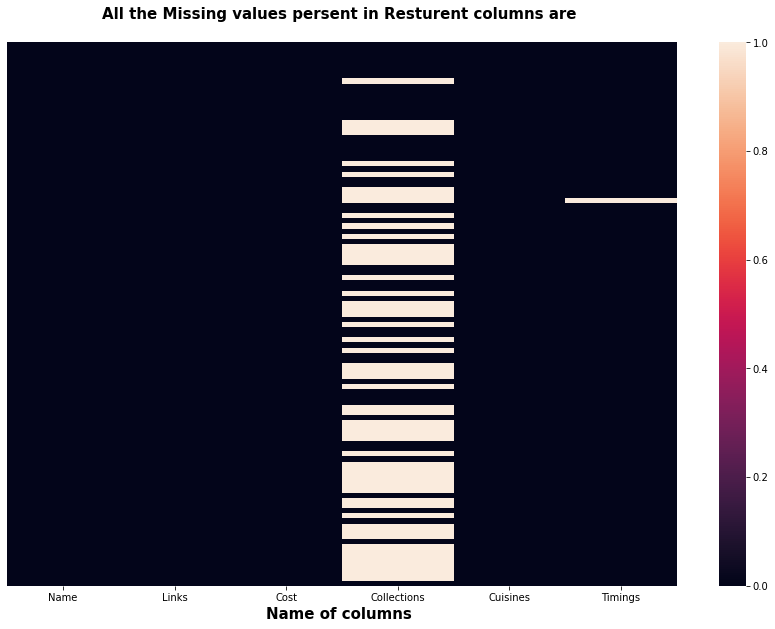

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(resturent_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values persent in Resturent columns are \n', fontweight= 'bold', size=15)

Text(0.5, 1.0, 'All the Missing values persent in Review columns are \n')

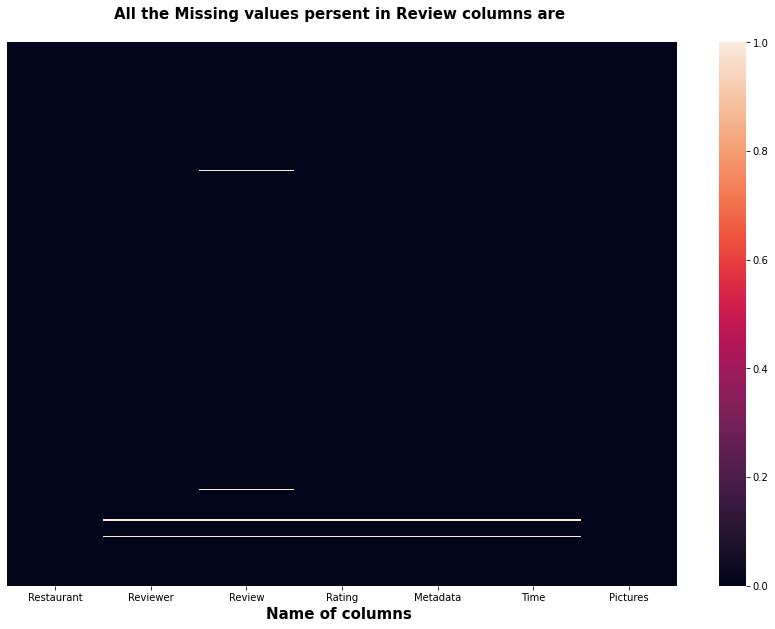

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(review_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values persent in Review columns are \n', fontweight= 'bold', size=15)

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different Variable/features.

* Collection Variable have high volume of null values persent and timing also has null values.

* There is no duplicate value persent in the resturent dataset.

* Cost feature represent the amount but it shows object type because it is saperated by ',' comma

* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 Variable/features.

* Only picture and restaurant feature does not have null value from .

* There are total of 36 duplicate values persent in the review dataset

* Rating represent ordinal data, has object data type should be integer.

* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f' The columns persent in the Resurent dataset \n')

print(resturent_df.columns.to_list() ,'\n')
print('--'*50 )
print(f'\n The columns persent in review dataset \n')
print(review_df.columns.to_list())

 The columns persent in the Resurent dataset 

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'] 

----------------------------------------------------------------------------------------------------

 The columns persent in review dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe
resturent_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
# Dataset Describe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique variable persent in the Resturent dataset')
print(resturent_df.nunique())

print('--'*50)
print('Number of unique variabele persent in Review dataset')
print(review_df.nunique())

Number of unique variable persent in the Resturent dataset
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64
----------------------------------------------------------------------------------------------------
Number of unique variabele persent in Review dataset
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [ ]:
# Code to find unique item in each variable of Resturent dataset
for col in resturent_df.columns.tolist():
  print(f' The Uniue values of  Resturent dataset varibles -- {col} = \n \n',  resturent_df[col].unique(),'\n')
  print('--'*50)

 The Uniue values of  Resturent dataset varibles -- Name = 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitche

In [ ]:
# Code to find unique item in each variable of Resturent dataset
for col2 in review_df.columns.tolist():
  print(f'The Uniue values persent in  {col2} : \n \n {review_df[col2].unique()} \n')
  print('--'*50)

The Uniue values persent in  Restaurant : 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom'

## 3. ***Data Wrangling***

Data wrangling can be defined as the process of cleaning, organizing, and transforming raw data into the desired format for analysts to use for prompt decision-making. Also known as data cleaning or data munging, data wrangling enables businesses to tackle more complex data in less time, produce more accurate results, and make better decisions. The exact methods vary from project to project depending upon your data and the goal you are trying to achieve. More and more organizations are increasingly relying on data wrangling tools to make data ready for downstream analytics.

### Data Wrangling Code

#### Wrangling Resturent  Dataset:

Wrangling on Cost feature/variable

In [ ]:
# Write your code to make your dataset analysis ready.
resturent_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Remove the ',' from the cost varible 
resturent_df['Cost']= resturent_df['Cost'].str.replace(',','').astype('int64')

In [ ]:
# Find out the  top 10 costly resturent 
Top_10_Expensive_Restuent=resturent_df.sort_values('Cost', ascending=False)[['Name', 'Cost']][:10]
Top_10_Expensive_Restuent

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


In [ ]:
# Find out 10 economicaly  resturent 
Top_10_cheapest_resturent=resturent_df.sort_values('Cost', ascending=True)[['Name', 'Cost']][:10]
Top_10_cheapest_resturent

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Wrangling on Collection feature/variable

In [ ]:
# spliting the Collection and storing in list 
Collections_list = resturent_df.Collections.dropna().str.split(', ')

In [ ]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [ ]:

# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number_of_Restaurants'})
     

In [ ]:
#top 10 collection
Collections_df.sort_values('Number_of_Restaurants', ascending =False)[:10]

,Tags,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
10,Trending This Week,5
9,Sunday Brunches,4
13,Veggie Friendly,4


Wrangling on Cuisine variable

In [ ]:
# store type of food in a a list with spliting all the food
cuisine_list =resturent_df.Cuisines.str.split(', ')

In [ ]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [ ]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})

In [ ]:

#top 10 cuisine
cusine_of_the_data=cuisine_df.sort_values('Number_of_Restaurants', ascending =False)
cusine_of_the_data[:10]

,Type_of_Food,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


### Review :

Wrengling on Rating variable/Feature

In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [ ]:
# convert Like into nan and type  of data
review_df.loc[review_df['Rating']=='Like']=np.nan
review_df['Rating']= review_df['Rating'].astype('float')

# Fill Null values by mean
review_df['Rating'].fillna(3.5, inplace=True)
review_df['Rating'].unique()


array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

Wrengling on Metadata variable/Feature

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers

review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

# Drop the Metadata columns
review_df = review_df.drop(['Metadata'], axis =1)
review_df.head()

<ipython-input-34-1a438cc36939>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str


,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0


In [ ]:
# Split the Time columns into Year Month and Hours
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
# code to find top reviewer
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_10_reviewers = reviewer_list[:10]
top_10_reviewers

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11
5958,Siva Kumar,10
4259,Priyanka,10
6130,Sravani,10
3134,Manojkumar D Nambisan,10
265,Age Of Foodies (Suraj Karambe),10


In [ ]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_10_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_10_reviewers_ratings=review_ratings[:10]
top_10_reviewers_ratings=top_10_reviewers_ratings.sort_values(by = 'Average_Ratings',ascending=False)
top_10_reviewers_ratings.head(10)

,Reviewer,Review_Count,Average_Ratings
2,Kiran,12,4.500000
4,Vedant Killa,11,4.000000
7,Sravani,10,4.000000
0,Ankita,13,3.923077
3,Jay Mehta,11,3.727273
8,Manojkumar D Nambisan,10,3.700000
5,Siva Kumar,10,3.600000
9,Age Of Foodies (Suraj Karambe),10,3.500000
1,Parijat Ray,13,3.192308
6,Priyanka,10,2.600000


In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
#Finding the most followed critic
most_followed_reviewer = review_df.groupby('Reviews').agg({'Reviewer':'max','Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Followers', ascending = False)
most_followed_reviewer[:10]

,Reviews,Reviewer,Followers,Average_Rating_Given
165,186.0,Satwinder Singh,13410.0,3.666667
60,60.0,Tirtha Das,13320.0,3.852941
8,8.0,Yaksh. Pgpm16c,11329.0,3.663842
31,31.0,Syed Ghouse Mohiuddin,9494.0,3.979167
34,34.0,Yashmita Hota,7628.0,3.907407
30,30.0,The Binge Journal,7589.0,3.794872
98,98.0,Vineet R,6931.0,3.071429
35,35.0,Ujj,5873.0,4.102941
63,63.0,Vibhor Dhote,5715.0,3.868421
129,130.0,YatenJaiswal,5533.0,3.750000


In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean','Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [ ]:
#merging both data frame
resturent_df = resturent_df.rename(columns = {'Name':'Restaurant'})
merged_df = resturent_df.merge(review_df, on = 'Restaurant')
merged_df.shape

(9999, 16)

In [ ]:
merged_df.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


### What all manipulations have you done and insights you found?

Firstly, We have started with changing the datatype of the variable persent in the dataset like cost and rating. this will help to make data consistent.



*   We have found 10 Expensive Resturent from the top and top 10 cheapest Resturent.  


*   Divide the Metadata variable into two varilable ie Review and Followers


*   Top 10 Collection and Top 10 Cuisine  


*   Splited the Time Variable into new variable like Year Month and Hours


*   We have found top 10 reviewer and the average rating of the reviewer.


*   Top 10 most which have highest number of follower


*   Merge the Resturent and Review variable with Name and resturent





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Distrbution plot of Cost, Rating, Year 

<ipython-input-43-5d1fb2a33e65>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85');
<ipython-input-43-5d1fb2a33e65>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85');
<ipython-input-43-5d1fb2a33e65>:6: UserWarning: 

`distplot` i

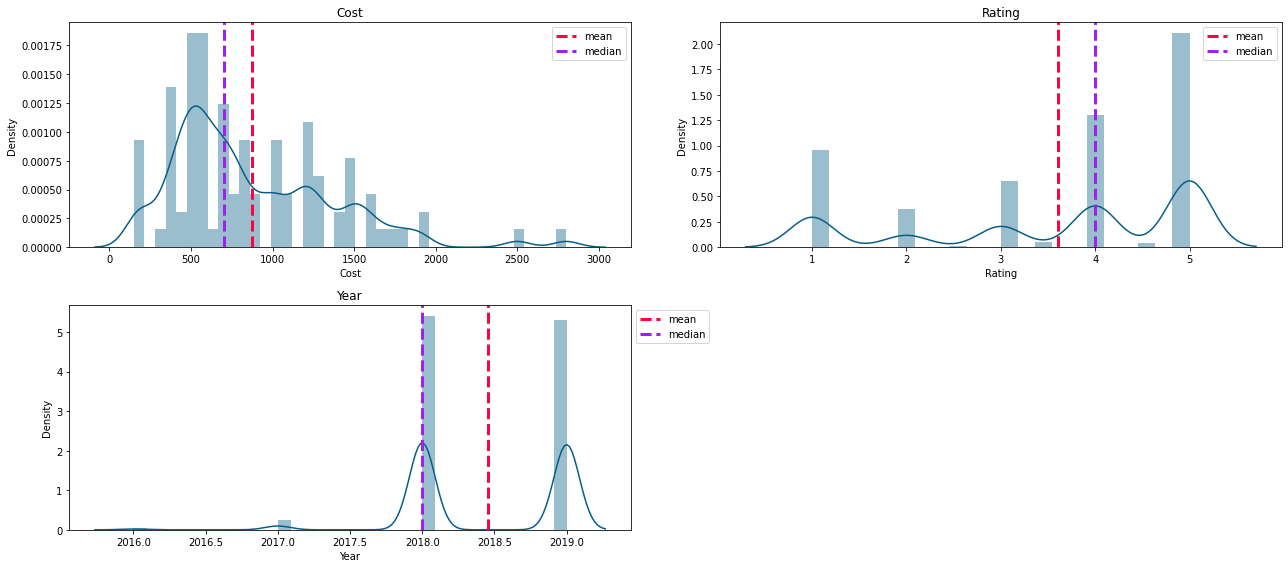

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85');
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

We have pick up Distplot which is helpful for understanding the distribution of the Distplot is helpful in understanding the distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the distplot we have found that all three variable persent have some skewness persent into it and Maximum resturent show the price range of 500 and 2018 and 2019 have high volume of review found.

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the Given distplot we have found important information ie Cost which makes high impect on business along with rating which show how much the person is engaged with the product. 

#### Chart - 2  Top 10 Expensive Reaturent

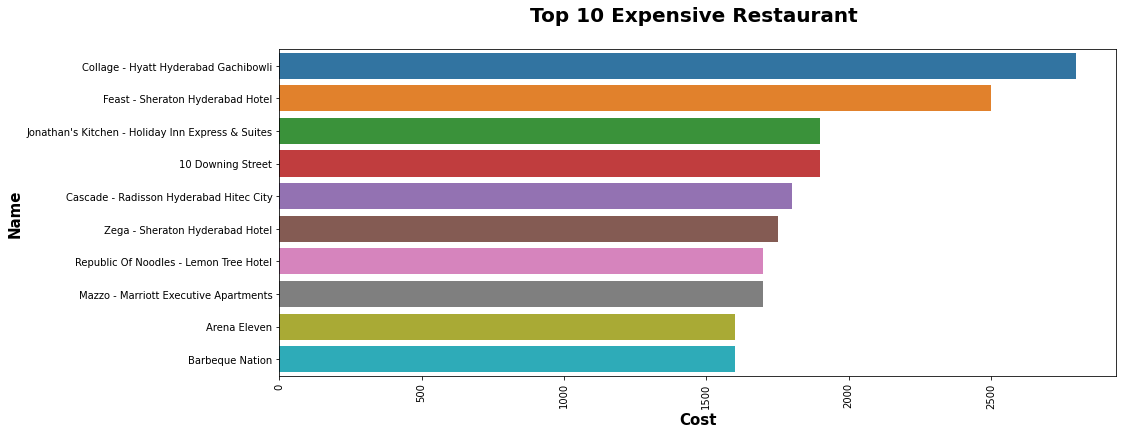

In [ ]:
# Chart - 1 visualization code fro Top 10 Expensive Reaturent
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = Top_10_Expensive_Restuent['Cost']
y = Top_10_Expensive_Restuent['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

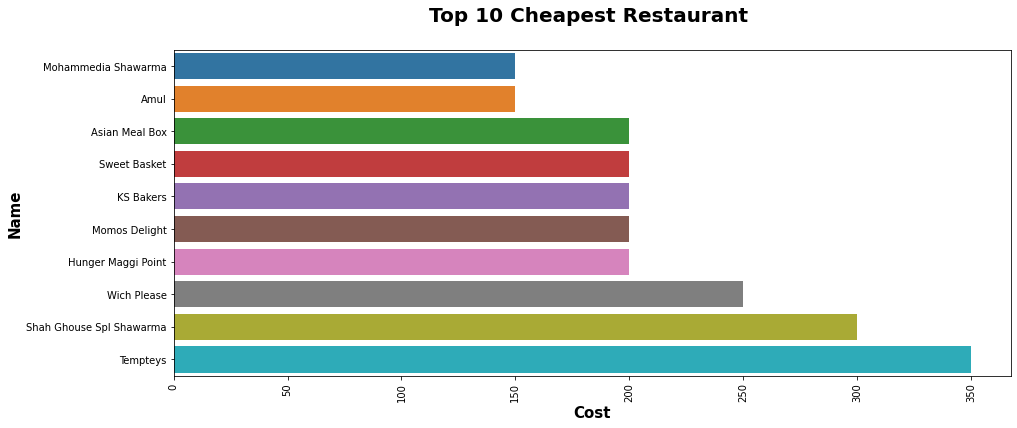

In [ ]:
# Chart - 1 visualization code fro Top 10 Expensive Reaturent

plt.figure(figsize=(15,6))
x = Top_10_cheapest_resturent['Cost']
y = Top_10_cheapest_resturent['Name']
plt.title("Top 10 Cheapest Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen chosen bar plot to find the Expensive and Cheapest resturent.

##### 2. What is/are the insight(s) found from the chart?

From the given chart we have found top 10 expensive and cheapest resturent from th given dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insigh we get from the given barchart will make high impect in business because it helps us n making the decision financially.

#### Chart - 3  :    Top 5 Tagg Resturent

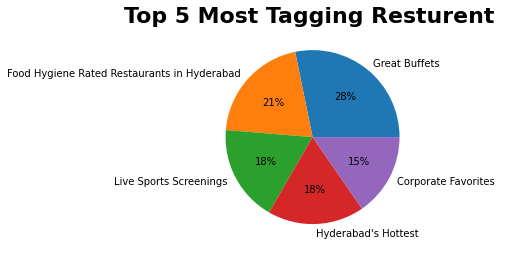

In [ ]:
# Chart - 2 visualization code pie chart for top 5 Tagging Resturent

collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Tags'].tolist()[:5]
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False) ['Number_of_Restaurants'].tolist()[:5]
labels = collection_list


#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Tagging Resturent ', size =22, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that from the top 5 'Tags' there are **28%** of them belong to **'Great Buffets'**, **21%** of them belong to **Food Hygiene Rated Resturents in Hyderabad** , **18%** of them are **Hydrabad's Hottest** and **15%** are **Corporate Favorites**.

#### Chart - 4   : WordCloud for Colllections

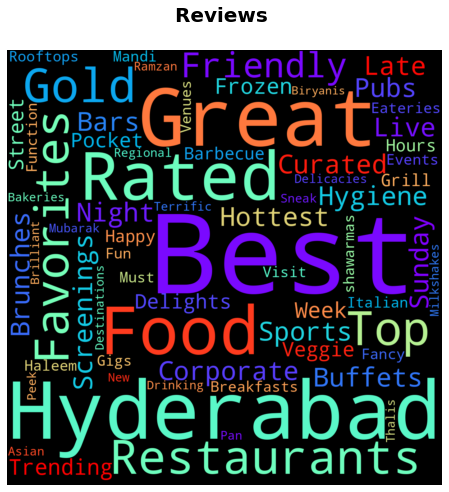

In [ ]:

# Chart - 4 WordCloud for Colllections
# Storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud


plt.title('Reviews \n',fontsize=20, weight = 'bold')
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the given Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like Hydrabad, Best, Great Food, Favorities, Rated etc 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given Word chart helps in Advertisement which directly import on business which helps to analyse.

#### Chart - 5   :    Top 5 most selling Cuisine

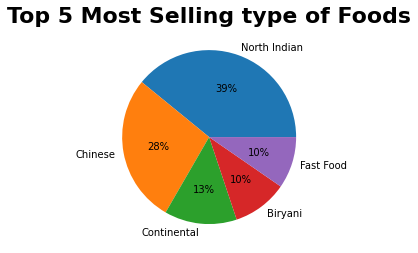

In [ ]:
# Chart - 5 visualization code pie chart for top 5 most selling cuisine
cuisine_list = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Type_of_Food'].tolist()[:5]
data = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Number_of_Restaurants'].tolist()[:5]
labels = cuisine_list

#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Selling type of Foods', size =22, weight ='bold', )
plt.show()

##### 1. Why did you pick the specific chart?

We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart We got to know that important information ie the top **5 Cusine**' there are **39%** of them belong to **North Indian**, **28%** of them belong to **Chinese** , **13%** of them are **Continental** and **10%** are belong to **Biryani** and **10%** are belong to Fast Food.

#### Chart - 6 Wordcloud for Cuisine

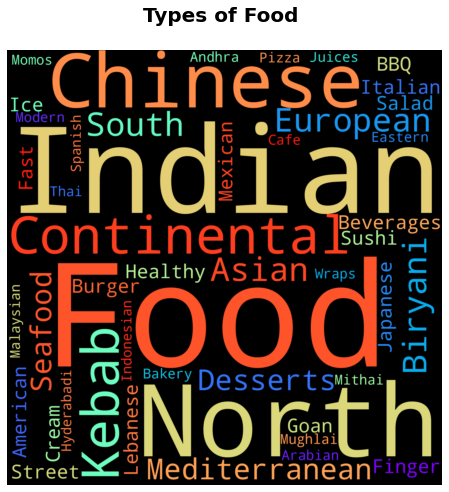

In [ ]:
# Chart - 6 wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Type_of_Food )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000, collocations = False, colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud


plt.title('Types of Food \n',fontsize=20, weight = 'bold')
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the given Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like North, Indian, Food, Chinees, Biryani etc 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given Word chart helps in Advertisement which directly import on business which helps to analyse.

#### Chart - 7  :  Top 10 Reviewers and Their Review

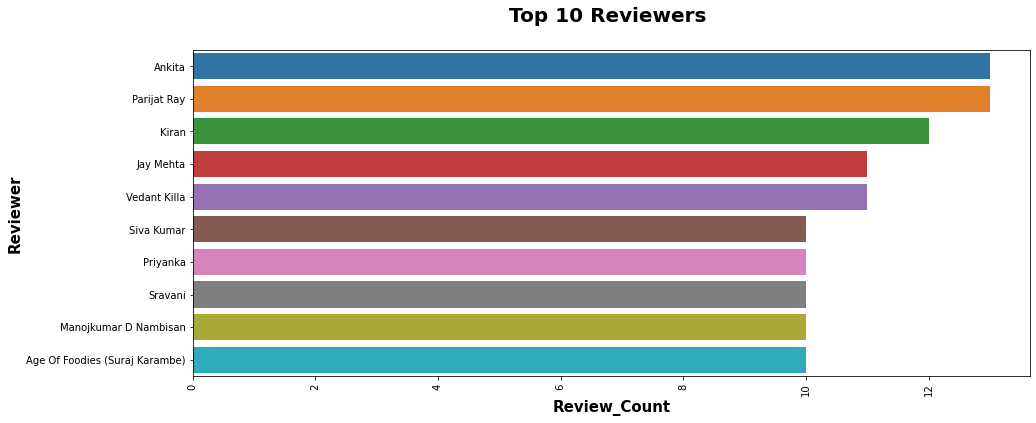

In [ ]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_10_reviewers['Review_Count']
y = top_10_reviewers['Reviewer']
plt.title("Top 10 Reviewers \n",fontsize=20, weight='bold')
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

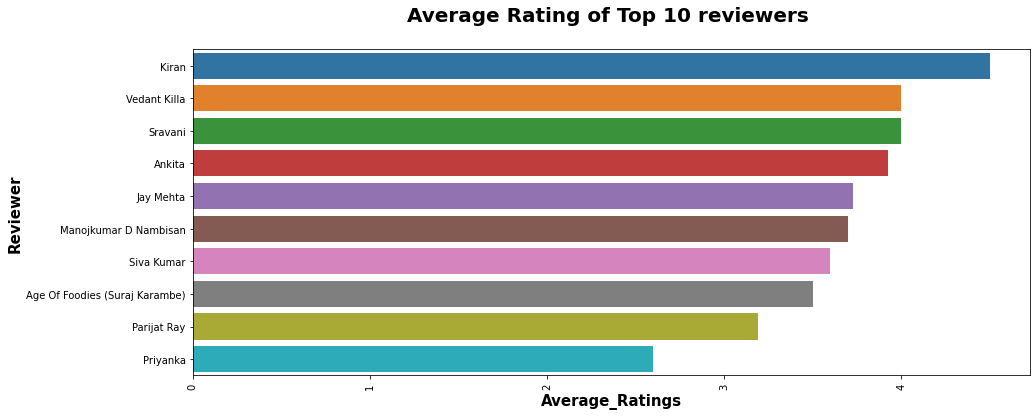

In [ ]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_10_reviewers_ratings['Average_Ratings']
y = top_10_reviewers_ratings['Reviewer']
plt.title("Average Rating of Top 10 reviewers \n",fontsize=20, weight='bold')
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen chosen bar plot to find the Reviews and their Average Review.

##### 2. What is/are the insight(s) found from the chart?

From the given braplot we have found top 10 Reviewers and their review are importent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Review of these top Reviewer is important because they have good knowledge about the that things so from thier review company can improve their quality which lead to growth in their business.

#### Chart - 8 : Most Followed Reviewer

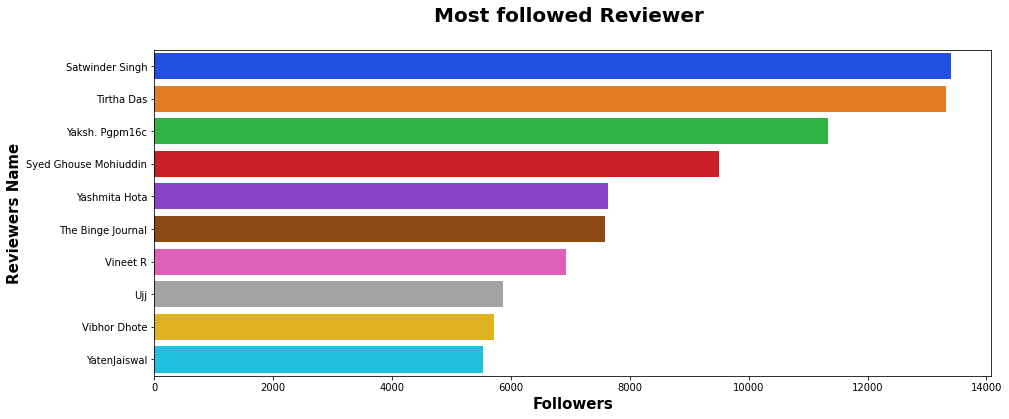

In [ ]:
# visualization code for most review follower
plt.figure(figsize=(15,6))
sns.barplot(data = most_followed_reviewer[:10], x = 'Followers', y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer \n',fontsize=20, weight = 'bold')
plt.ylabel("Reviewers Name",weight='bold',fontsize=15)
plt.xlabel("Followers",weight='bold',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen chosen bar plot to find the Reviewers Name and Their Follower

##### 2. What is/are the insight(s) found from the chart?

From the given chart we have found top 10 Reviewer Name on the basis of follower basis from the given dataset.

#### Chart - 9 :    Word cloud for Review

(-0.5, 1399.5, 1399.5, -0.5)

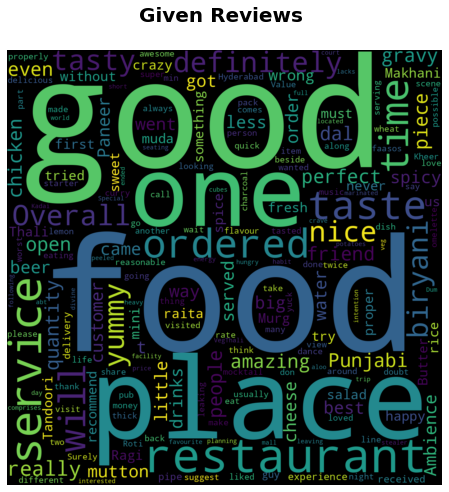

In [ ]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.title('Given Reviews \n',fontsize=20, weight = 'bold')
plt.axis("off")

##### 1. Why did you pick the specific chart?

We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the given Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like Food, Good, Place, Resturent so on. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given Word chart helps in Advertisement which directly import on business which helps to analyse.

#### Chart - 10 - Correlation Heatmap

<Axes: >

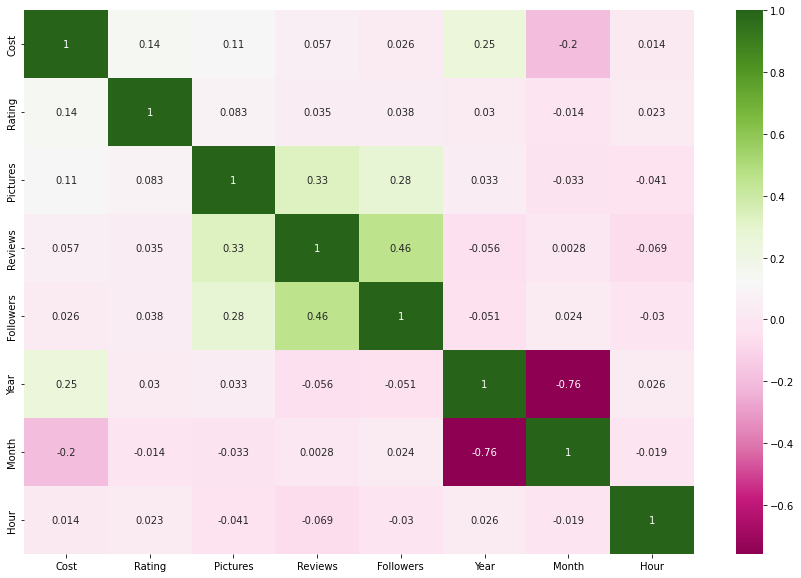

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(merged_df.corr(), cmap ='PiYG', annot = True)

##### 1. Why did you pick the specific chart?

We have pick up this heatmap chart to find insights to analyse that how the given one variable are the corelation to another variable.

##### 2. What is/are the insight(s) found from the chart?

From the heat map we can say that no any variable is corelated to any one so the variable of the data which is provided so we can implement the algorithms without dealing with the corelation.



*   Pictures and follower are positively correlated with each orther by - 28%

*   Pictures and Reviews are possitively correlated with each orther by - 33%

*   Year and Cost are possitively correlated with each orther by - 25%

*   Followers and Reviews are positively correlated with each orther by - 48%




#### Chart - 11 - Pair Plot 

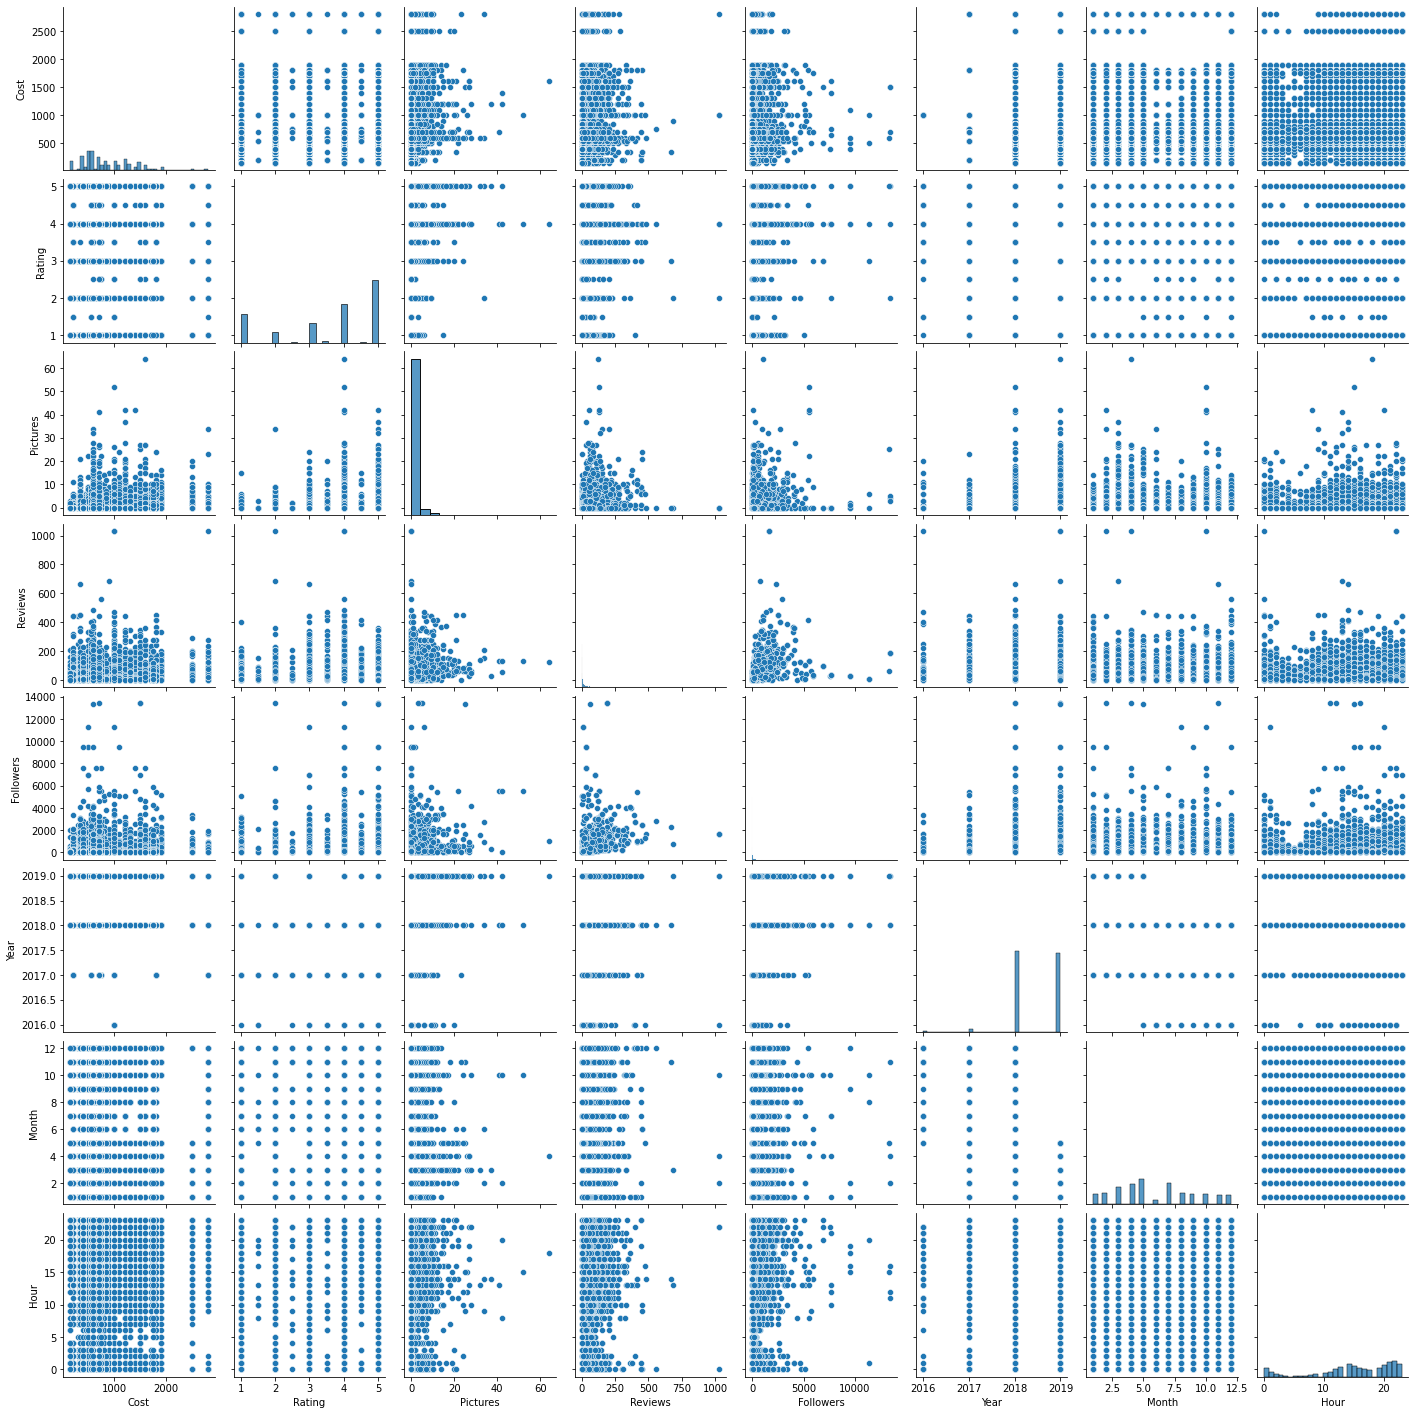

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.

* Restaurants that are reviewed by reviewers with more followers will have a higher rating.

* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straight forward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Followers', data = merged_df).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis : That's mean The number of followers a reviewer has has no effect on the rating of a restaurant.")
else:
    print("Fail to reject Null Hypothesis : That's Mean The number of followers a reviewer has has a positive effect on the rating of a restaurant.")


Reject Null Hypothesis : That's mean The number of followers a reviewer has has no effect on the rating of a restaurant.


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used Simple Linear Regression Test.

##### Why did you choose the specific statistical test?

I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

### Hypothetical Statement - 3

Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])[:1]

Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis : Thats's mean the variety of cuisines offered by a restaurant has no effect on its rating.")
else:
    print("Fail to reject Null Hypothesis : That's mean the variety of cuisines offered by a restaurant has a positive effect on its rating.")

Reject Null Hypothesis : Thats's mean the variety of cuisines offered by a restaurant has no effect on its rating.


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating. 

##### Why did you choose the specific statistical test?

 I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Heandle Duplicate Values from the dataset

In [ ]:
# Check the duplcate values persent in the data set
print(f'Total number of Duplicate Value persent in Restuent datast set {resturent_df.duplicated().sum()} \n')
print(f'Total number of Duplicate Value persent in Review datast set {review_df.duplicated().sum()}')

Total number of Duplicate Value persent in Restuent datast set 0 

Total number of Duplicate Value persent in Review datast set 36


In [ ]:
# Drop Duplicate values from the dataset

review_df.drop_duplicates(inplace= True)

# check the duplcate value after drop

print(f'Total numer of Duplicate Value persent in Restuent datast set {resturent_df.duplicated().sum()} \n')
print(f'Total numer of Duplicate Value persent in Review datast set {review_df.duplicated().sum()}')

Total numer of Duplicate Value persent in Restuent datast set 0 

Total numer of Duplicate Value persent in Review datast set 0


### Handle Missing values from Resturent Dataset

In [ ]:
# Handling Missing Values & Missing Value Imputation
resturent_df.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Fill null values with mode 
resturent_df.Timings.fillna(resturent_df.Timings.mode()[0],inplace=True)

In [ ]:
# check percentage of missing values  in Collections

missing_percentage = ((resturent_df['Collections'].isnull().sum())/(len(resturent_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [ ]:
# More then 50% of the data is missing so we are droping the colllection collumns
resturent_df.drop('Collections', axis=1, inplace = True)
resturent_df.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

### Handle Missing values from Resturent Dataset

In [ ]:
review_df.isnull().sum()

Restaurant       1
Reviewer         3
Review          10
Rating           0
Time             3
Pictures         1
Reviews          3
Followers     1581
Year             3
Month            3
Hour             3
dtype: int64

In [ ]:
review_df[review_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,3.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
review_df['Restaurant'].dropna(inplace = True)


In [ ]:
review_df = review_df.dropna(subset=['Restaurant','Reviewer','Reviews'])
review_df.isnull().sum()

Restaurant       0
Reviewer         0
Review           7
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1578
Year             0
Month            0
Hour             0
dtype: int64

In [ ]:
#filling null values in review and reviewer follower column
review_df = review_df.fillna({"Review": "No Review", "Followers": 0})
review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [ ]:
# Merge Both Dataset 
merge_df= resturent_df.merge(review_df, on = 'Restaurant')
merge_df.shape

(9961, 15)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We started with removing duplicte values persent in review dataset and handle missing vlaues persent in both resturent and Review dataset. 


Dataset that contains details about Resturent, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer - 2, Review - 9, Rating - 2, Metadata - 2, Time - 2, Reviewer_Total_Review- 3, Reviewer_Followers - 1581, Review_Year - 2, Review_Month - 2, Review_Hour - 2. On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

#### Anamoly Detection 

In [ ]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest
#checking for normal distribution 
print("Skewness - Cost: %f" % merge_df['Cost'].skew())
print("Kurtosis - Cost: %f" % merge_df['Cost'].kurt())
print("Skewness - Followers: %f" % merge_df['Followers'].skew())
print("Kurtosis - Followers: %f" % merge_df['Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Followers: 10.092703
Kurtosis - Followers: 151.312960


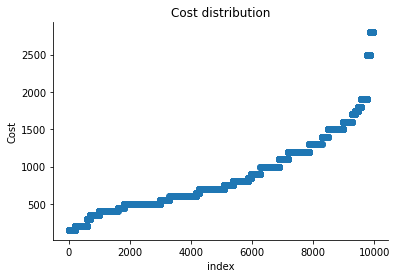

In [ ]:
# Scatter Plot of Cost 
plt.scatter(range(merge_df.shape[0]), np.sort(merge_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

<ipython-input-74-ab61154a43bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Cost'])


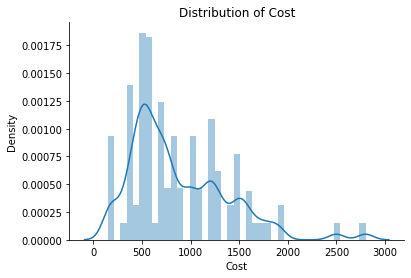

In [ ]:
#distribution of cost
sns.distplot(merge_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()

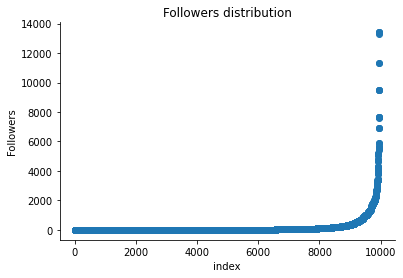

In [ ]:
#plot for reviewer follower
plt.scatter(range(merge_df.shape[0]), np.sort(merge_df['Followers'].values))
plt.xlabel('index')
plt.ylabel('Followers')
plt.title("Followers distribution")
sns.despine()

<ipython-input-76-8112ca6183a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Followers'])


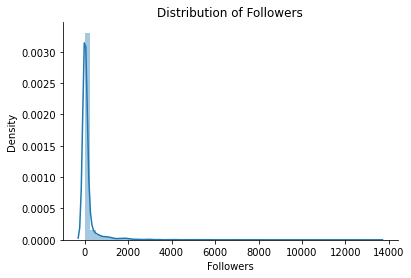

In [ ]:
#distribution of Reviewer_Followers
sns.distplot(merge_df['Followers'])
plt.title("Distribution of Followers")
sns.despine()

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merge_df['Cost'].values.reshape(-1, 1))
merge_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merge_df['Cost'].values.reshape(-1, 1))
merge_df['outlier_univariate_Cost'] = isolation_forest.predict(merge_df['Cost'].values.reshape(-1, 1))

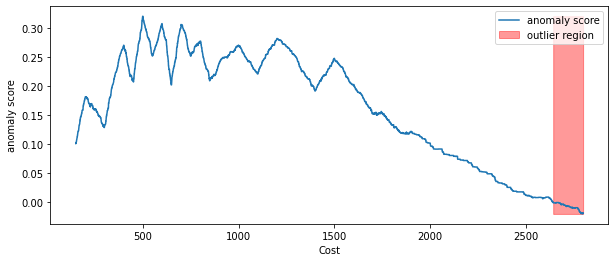

In [ ]:
#chart to visualize outliers
xx = np.linspace(merge_df['Cost'].min(), merge_df['Cost'].max(), len(merge_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [ ]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merge_df['Followers'].values.reshape(-1, 1))
merge_df['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merge_df['Followers'].values.reshape(-1, 1))
merge_df['outlier_univariate_follower'] = isolation_forest.predict(
    merge_df['Followers'].values.reshape(-1, 1))

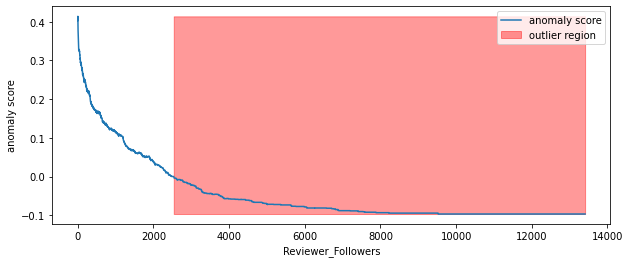

In [ ]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merge_df['Followers'].min(), merge_df['Followers'].max(), len(merge_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

####Treating Outlier

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merge_df.describe().columns:
  if abs(merge_df[i].mean()-merge_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
resturent_df.loc[resturent_df['Cost']<= outlier_treatment_skew(df=resturent_df, feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=resturent_df,feature='Cost')[1]

#upper limit capping
resturent_df.loc[resturent_df['Cost']>= outlier_treatment_skew(df=resturent_df, feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=resturent_df,feature='Cost')[0]


# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review_df.loc[review_df['Followers']<= outlier_treatment_skew(df=review_df,feature='Followers')[1], 'Followers']=outlier_treatment_skew(df=review_df,feature='Followers')[1]

#upper limit capping
review_df.loc[review_df['Followers']>= outlier_treatment_skew(df=review_df, feature='Followers')[0], 'Followers']=outlier_treatment_skew(df=review_df,feature='Followers')[0]

In [ ]:
#dropping the columns created while outliers treatment
merge_df.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost','anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

In [ ]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
resturent_df = resturent_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
resturent_df.head(1)

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28


##### What all outlier treatment techniques have you used and why did you use those techniques?

We have found that follower feature show positively skew distribution and using isolation forest they have outliers, So We have used capping technique instead of removing outliers, capped outliers with the highest and lowest limit using IQR method.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = resturent_df[['Restaurant','Cuisines']]

#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")


#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

<ipython-input-86-9a75dafc6e7c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')


In [ ]:
#total cuisine count 
resturent_df['Total_Cuisine_Count'] = resturent_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
resturent_df.head()

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,5


In [ ]:
cluster_dummy.head(2)

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,10 Downing Street,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13 Dhaba,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#adding cost column to the new dataset 
cluster_dummy = resturent_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')
cluster_dummy.shape


(100, 46)



---

Alternate Method for creating dummies

In [ ]:
#creating data frame for categorial encoding
cluster_df = resturent_df[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [ ]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [ ]:
#result from encoding
cluster_df.head(2).T

,0,1
Restaurant,Beyond Flavours,Paradise
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese"
Cost,800.0,800.0
Average_Rating,4.28,4.7
Total_Cuisine_Count,6.0,3.0
Chinese,1,1
Continental,1,0
Kebab,1,0
European,1,0
South Indian,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0.
Benefit of using one hot encoding:

* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# creating new df for text processing of sentiment analysis
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
# analysing five random sample
sentiment_df.sample(5)

,Reviewer,Restaurant,Rating,Review
2706,Yalla Yaswanth Kumar,"3B's - Buddies, Bar & Barbecue",5.0,Govind serve us very well. He is very polite a...
4148,Nagaraju N,Karachi Bakery,5.0,good
13,Pradeep Vetapalem,Beyond Flavours,5.0,Food is too good. Telangana kodiak fry is must...
9248,Saheb Pramanick,Collage - Hyatt Hyderabad Gachibowli,5.0,Nice place for couple.. I loved this place. I'...
4259,Anita Maji,Karachi Cafe,2.0,"Visited this place for an early lunch, as ever..."


In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index


sentiment_df.sample(5)



,index,Reviewer,Restaurant,Rating,Review
598,598,Aashima Bhootna,The Fisherman's Wharf,3.0,Visited this place on Saturday evening.\nHad s...
3608,3608,Ipsit Sahoo,Banana Leaf Multicuisine Restaurant,4.0,The food quality in a la carte was kinda so-so...
8217,8217,Nikhil Mahale,Al Saba Restaurant,3.0,They have really good bryani and starters. Ove...
4544,4544,Rakul,Owm Nom Nom,5.0,good
6500,6500,YatenJaiswal,Komatose - Holiday Inn Express & Suites,2.0,Very limited menu for bar and food. Service is...


In [ ]:
 # Install contractions 
!pip install contractions

# import sys
import sys  
!{sys.executable} -m pip install contractions

# import contactions 
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 22.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Expand Contraction

# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [ ]:
# Code to Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
#remove punctuation using  Created function 
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
3383,3383,Raj Kumar,Club Rogue,4.0,the ambience of the club is really nice the st...
100,100,Subodh Deshmukh,Paradise,5.0,paradise biryani is really good service also g...
381,381,Rag,Shah Ghouse Hotel & Restaurant,5.0,our regular place to have chickenmutton biryan...
2866,2866,SHYAMAL,Behrouz Biryani,4.0,biryani ❤️ not just a food for hyderabadis it...
9426,9426,Shiva,Dunkin' Donuts,1.0,worst food ever i had


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Import Library
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
resturent_df['Location'] = resturent_df['Links'].apply(get_location)
resturent_df.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count,Location
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5,hyderabad
98,Triptify,https://www.zomato.com/hyderabad/triptify-gach...,400,North Indian,11 AM to 11 PM,3.55,1,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
# function call to remove Stopwords

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

# Remove Stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#random sample 
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5278,5278,Venkat Reddy S,Biryanis And More,1.0,good using much oil biryani good three months ...
7225,7225,Asmita Paul,Labonel,5.0,everything delectable last bit prices bit high...


#### 6. Rephrase Text

In [ ]:

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# # Rephrase Text


# function to create rephrase sentence
def rephrase_sentence(sentence):
     # Tokenize the sentence
     tokens = nltk.word_tokenize(sentence)

     # Replace each token with its synonyms
     new_sentence = []
     for token in tokens:
         synonyms = wordnet.synsets(token)
         if synonyms:
             new_sentence.append(synonyms[0].lemmas()[0].name())
         else:
             new_sentence.append(token)

      #Join the tokens back into a sentence
     rephrased_sentence = " ".join(new_sentence)

     return rephrased_sentence



In [ ]:
 #apply the function to the 'Review' column 
 sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_sentence)
 sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
1610,1610,Priti Singh,NorFest - The Dhaba,1.0,order food herebut one guy name neodymium stat...
1472,1472,Prasanthi Muddalapuram,AB's - Absolute Barbecues,5.0,absolute amazing experiencegone ma love italam...
6805,6805,Payel Biswas,The Tilt Bar Republic,4.0,food amaze though space constraint atmosphere ...
5775,5775,Suryakanta Sahoo,Being Hungry,5.0,food amazing
46,46,Sameer Singh,Beyond Flavours,4.0,service truly exceeding cheer manav serve Unit...


#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
2545,2545,Chenreddy Raginireddy,Tiki Shack,5.0,"[travel, friend, observe, love, anniversary, b..."
1221,1221,Shanmukharo Bendi31,Absolute Sizzlers,5.0,"[absolute, sizzlers, sizzlers, thay, meny, par..."
4125,4125,DatesWithEats,Karachi Bakery,5.0,"[hey, hyderabadiissss, everyone, Hyderabad, mu..."
7784,7784,Prakash Vakharia,Squeeze @ The Lime,5.0,"[fix, custom-make, food, item, suggestion, lov..."
9742,9742,Maheen,Zega - Sheraton Hyderabad Hotel,4.0,"[Nice, cosy, topographic_point, great, topogra..."


#### 8. Text Normalization

In [ ]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
7110,7110,Mounika,Eat India Company,3.0,"[beautiful, atmosphere, vintage, expression, t..."
3467,3467,Dhruv Chhabra,Mazzo - Marriott Executive Apartments,5.0,"[amaze, topographic_point, need, cool, chill, ..."
5453,5453,Shrivatsav Sundar,Asian Meal Box,2.0,"[order, chili, paneer, fry, rice, taste, truly..."
2289,2289,Sailaja Sailu,B-Dubs,5.0,"[topographic_point, great, love, wing, prompt,..."
4011,4011,Leena Gupta,Frio Bistro,2.0,"[one, poor_people, Italian, restaurant, Hydera..."


##### Which text normalization technique have you used and why?

We have used **Lemmatization** as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

---

**Other Method for Normalization**

---
Tokenization is the process of breaking down a sentence or a piece of text into individual words or tokens. Tokenization is an important step in natural language processing as it allows us to work with individual words rather than the entire text.

Stemming is the process of reducing words to their base or root form. This is useful in natural language processing because it allows us to reduce the dimensionality of the data by converting words to their common form. This can help improve the performance of models by reducing the number of unique words that need to be processed.

Stemming can be used because they are common normalization techniques used in natural language processing to preprocess text data before it is fed into a model. Tokenization is the first step and it breaks down the text into individual words, which is necessary for most NLP tasks. Stemming is used to reduce the dimensionality of the data by converting words to their common form, this is useful for text classification and other NLP tasks where the meaning of the words is important.

⚡In general, stemming is a more aggressive technique that can remove more of the original word form, which may make it difficult for a lemmatizer to accurately identify the base form of the word. Additionally, some stemming algorithms may create non-real words, which are difficult for a lemmatizer to handle.
Therefore, if the goal is to maintain the meaning of the text and preserve more of the original word forms, it would be more appropriate to apply lemmatization before stemming. However, if the goal is to reduce all words to their base forms and to group together different forms of the same word, it may be useful to try both ways and compare the results.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
sentiment_tfid = sentiment_df.copy()

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
sentiment_tfid.sample(5)

,index,Reviewer,Restaurant,Rating,Review
9105,9105,Vishesh Raj,Cascade - Radisson Hyderabad Hitec City,5.0,"[(Delicious, NNP), (food, NN), (alot, NN), (as..."
4262,4262,Astha Sharma,Karachi Cafe,4.0,"[(roentgen, NN), (look, NN), (topographic_poin..."
1205,1205,Ramesh Pedada,Absolute Sizzlers,5.0,"[(thanks, NNS), (thanks, NNS), (thanks, VBP), ..."
8833,8833,Mahesh,Domino's Pizza,5.0,"[(Delicious, JJ)]"
9099,9099,Neharika Christabel,Cascade - Radisson Hyderabad Hitec City,5.0,"[(good, JJ), (experiencewarm, NN), (welcome, N..."


Part-of-speech (POS) tagging can be important for sentiment analysis in some cases, as it can provide additional information about the structure and meaning of the text.

For example, certain POS tags, such as adjectives and adverbs, are often used to express sentiment. By identifying these POS tags in the text, a sentiment analysis model can gain a better understanding of the sentiment being expressed. Additionally, certain grammatical structures, such as negations or modals, can change the sentiment of a sentence. By identifying these structures through POS tagging, a sentiment analysis model can take them into account when determining the overall sentiment of the text.

However, it's worth noting that POS tagging is not always necessary for sentiment analysis. In some cases, a model may be able to achieve good performance without using POS tagging. Additionally, the complexity of a model that uses POS tagging increases, which could lead to longer training time and higher computational cost.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)

#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
!pip install gensim
import gensim
from gensim import corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)


In [ ]:
#print token dict
print(tokens_dict.token2id)

{'Saturday': 0, 'atmosphere': 1, 'besides': 2, 'brunch': 3, 'chill': 4, 'cost': 5, 'courteous': 6, 'effective': 7, 'food': 8, 'friend': 9, 'good': 10, 'helpful': 11, 'hyrax': 12, 'lunch': 13, 'one': 14, 'parent': 15, 'quite': 16, 'satiate': 17, 'soumen': 18, 'topographic_point': 19, 'truly': 20, 'waiter': 21, 'evening': 22, 'experience': 23, 'pleasant': 24, 'praise': 25, 'prompt': 26, 'service': 27, 'alfredo': 28, 'amaze': 29, 'attempt': 30, 'background': 31, 'great': 32, 'music': 33, 'must': 34, 'pasta': 35, 'penne': 36, 'personal': 37, 'pradeep': 38, 'recommendation': 39, 'subroto': 40, 'thnx': 41, 'arun': 42, 'behavior': 43, 'course': 44, 'guy': 45, 'like': 46, 'sincerety': 47, 'visit': 48, 'would': 49, 'basket': 50, 'biryani': 51, 'drumstick': 52, 'enjoy': 53, 'goodwe': 54, 'kodi': 55, 'mouton': 56, 'order': 57, 'serve': 58, 'thanks': 59, 'well': 60, 'apradeecp': 61, 'best': 62, 'caption': 63, 'hostess': 64, 'papiya': 65, 'restaurant': 66, 'star': 67, 'subro': 68, 'Nice': 69, 'diff

In [ ]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,Saturday,1
1,0,Beyond Flavours,atmosphere,1
2,0,Beyond Flavours,besides,1
3,0,Beyond Flavours,brunch,1
4,0,Beyond Flavours,chill,1


##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### Resturent Dataset

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
print(f' The number of row and columns persent in Resturent Dataset : {resturent_df.shape} , \n ')
print('--'*50, '\n')

print('All the variable persent in Resturent Dataset \n')
print(list(resturent_df.columns),  '\n \n')


resturent_df.head()

 The number of row and columns persent in Resturent Dataset : (100, 8) , 
 
---------------------------------------------------------------------------------------------------- 

All the variable persent in Resturent Dataset 

['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Average_Rating', 'Total_Cuisine_Count', 'Location'] 
 



,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,6,hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,3,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,4,hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5,hyderabad
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,5,hyderabad


In [ ]:
cluster_df.columns

Index(['Restaurant', 'Cuisines', 'Cost', 'Average_Rating',
       'Total_Cuisine_Count', 'Chinese', 'Continental', 'Kebab', 'European',
       'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean',
       'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
cluster_df.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

#dropping cuisine and restaurant from cluster_df
cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1, inplace= True)

In [ ]:
cluster_df.head()

,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,800.0,4.28,6.0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,4.70,3.0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1300.0,4.66,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,800.0,3.21,5.0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,4.34,5.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 46)

#### Review Dataset

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
print(f' The number of row and columns persent in Resturent Dataset : {review_df.shape} , \n ')
print('--'*50, '\n')

print('All the variable persent in Resturent Dataset \n')
print(list(review_df.columns),  '\n \n')


review_df.head()

 The number of row and columns persent in Resturent Dataset : (9961, 11) , 
 
---------------------------------------------------------------------------------------------------- 

All the variable persent in Resturent Dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour'] 
 



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
3478,3478,Nikita,Mazzo - Marriott Executive Apartments,4.0,"[go, topographic_point, beautiful, calm, atmos...",1
1680,1680,Gourmet Keen,NorFest - The Dhaba,4.0,"[strongly, recommend, Punjabi, butter, chicken...",1
9492,9492,KhaneChale,Desi Bytes,3.0,"[order, egg, mushroom, fry, rice, food, rather...",0
7668,7668,Anjali,The Old Madras Baking Company,3.0,"[particularly, idea, topographic_point, close,...",0
4856,4856,Udhay Kumar,Udipi's Upahar,5.0,"[excellent, delivery, much, appreciate]",1


#### 2. Feature Selection

In [ ]:
# All the column persent in Resturent Dataset
resturent_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Average_Rating',
       'Total_Cuisine_Count', 'Location'],
      dtype='object')

In [ ]:
# All the column persent in cluster dummy Dataset
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican',
       'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian',
       'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food',
       'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [ ]:
# All the column persent in review Dataset
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Reviews', 'Followers', 'Year', 'Month', 'Hour'],
      dtype='object')

In [ ]:
# Feature Selected for clustering
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

We had used **PCA for feature selection**, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : ",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : ",non_symmetric_feature)

Symmetric Distributed Features :  ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features :  ['Cost']


In [ ]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

<ipython-input-137-8079a2936651>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_df[col], color = '#055E85');


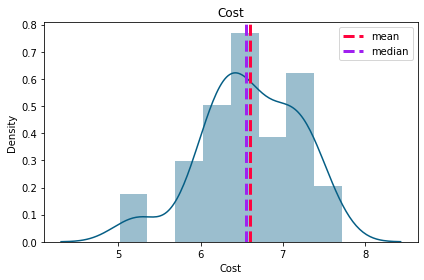

In [ ]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85');
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

### 6. Data Scaling

In [ ]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
63,Dine O China,6.746412,3.370,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Club Rogue,6.803505,2.880,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
92,Collage - Hyatt Hyderabad Gachibowli,7.719130,3.410,5,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Paradise,6.685861,4.700,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
85,Momos Delight,5.303305,3.725,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

We have used StandardScaler to removes the mean and scales each feature/variable to unit variance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# print sample dataset
scaled_df.sample()

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
10,Sardarji's Chaats & More,-1.022424,-0.696047,-0.008305,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:

#applying pca to for the dimensionlty deduction

features = scaled_df.columns
features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

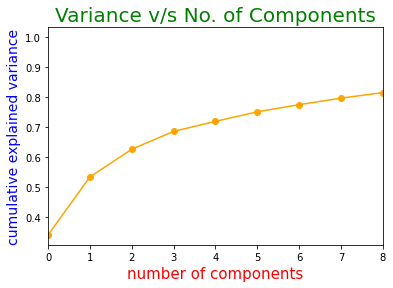

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34169724 0.19318921 0.09207771]
Cumulative variance explained by 3 principal components: 62.70%


In [ ]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 46)
transformed shape: (100, 3)


Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

There are two main types of dimensionality reduction techniques: feature selection and feature extraction.

Feature selection is the process of selecting a subset of the most relevant features from the original feature set. It is a technique that helps to reduce the dimensionality of the data by removing irrelevant and redundant features. Common feature selection techniques include:

* Correlation-based feature selection
* Mutual information-based feature selection
* Recursive feature elimination
* SelectKBest

Feature extraction is the process of creating new features from the original feature set by combining or transforming the existing features. It is a technique that helps to reduce the dimensionality of the data by creating a new feature space that is more compact and informative than the original feature space. Common feature extraction techniques include:

* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Independent Component Analysis (ICA)
* Non-Negative Matrix Factorization (NMF)
* Autoencoder

Both feature selection and feature extraction can be used to reduce the dimensionality of the data and improve the performance of machine learning models. However, the choice of technique depends on the specific task, the data, and the computational resources available.

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.


When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.



### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#from text vectorization

X = X_tfidf 
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9961, 6)

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 15341)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 15341)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why? 

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [ ]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Count'})

In [ ]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [ ]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

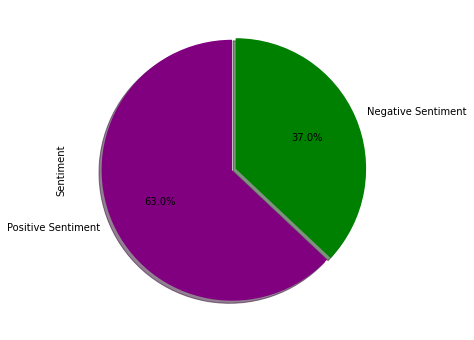

In [ ]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,shadow=True,
                                              labels=['Positive Sentiment','Negative Sentiment'],colors=['purple','green'],explode=[0.01,0.02])
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have found that there is imbalance in dataset with 63: 37 ratio, where 63 is the majaority class and 37 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., **not required** to treat class imabalance.

## ***7. ML Model Implementation***

### **ML Model - 1 K Mean Clustering** 

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. 

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

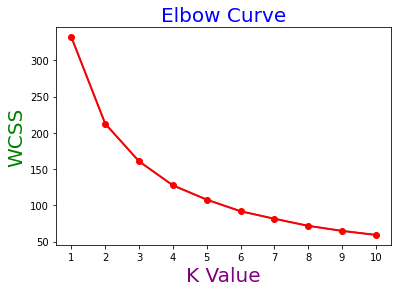

In [ ]:
# Elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 average silhouette_score is : 0.3131574210408015
For n_clusters = 3 average silhouette_score is : 0.2944780871242098


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 average silhouette_score is : 0.31238975452474504


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 average silhouette_score is : 0.306995563619912
For n_clusters = 6 average silhouette_score is : 0.31075799059042075


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 average silhouette_score is : 0.3135532827826133
For n_clusters = 8 average silhouette_score is : 0.3043695771946016
For n_clusters = 9 average silhouette_score is : 0.3131937975271868


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


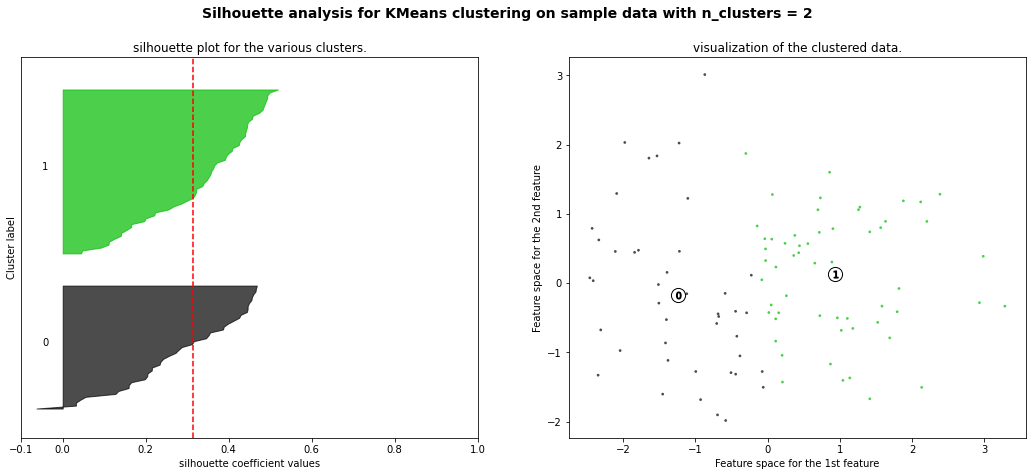

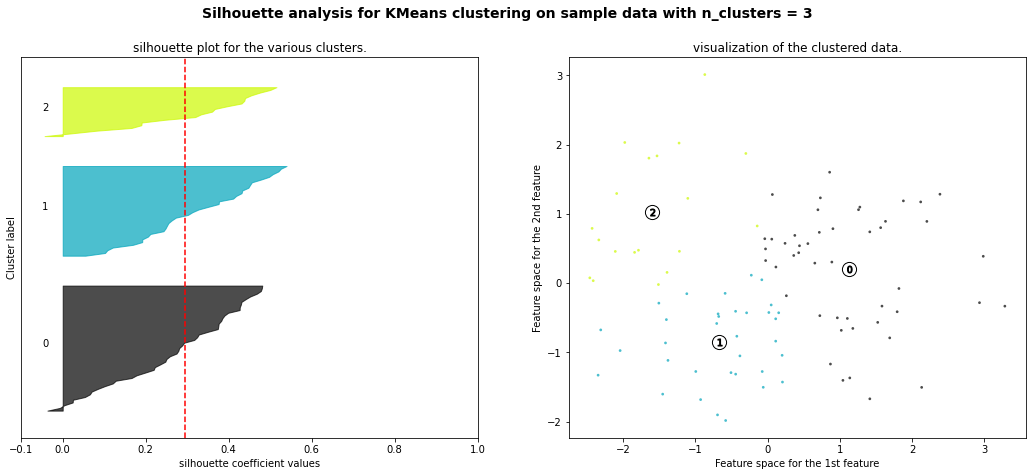

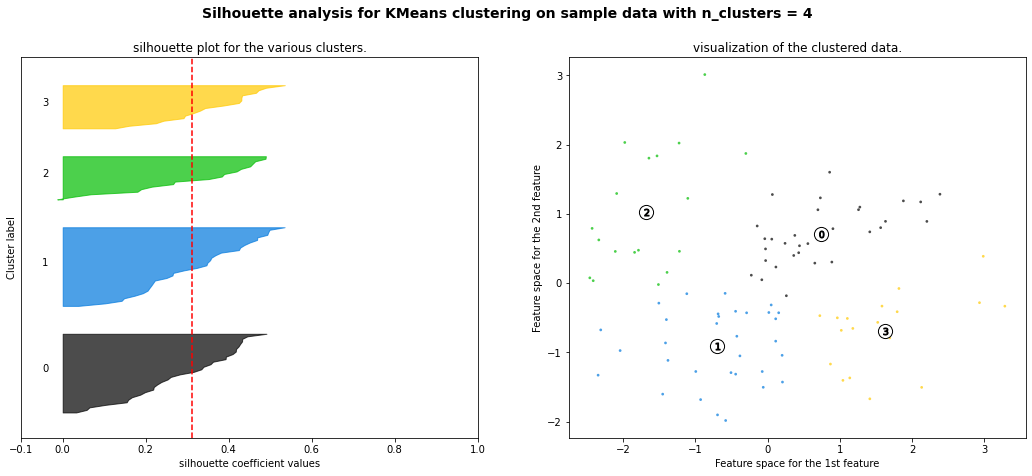

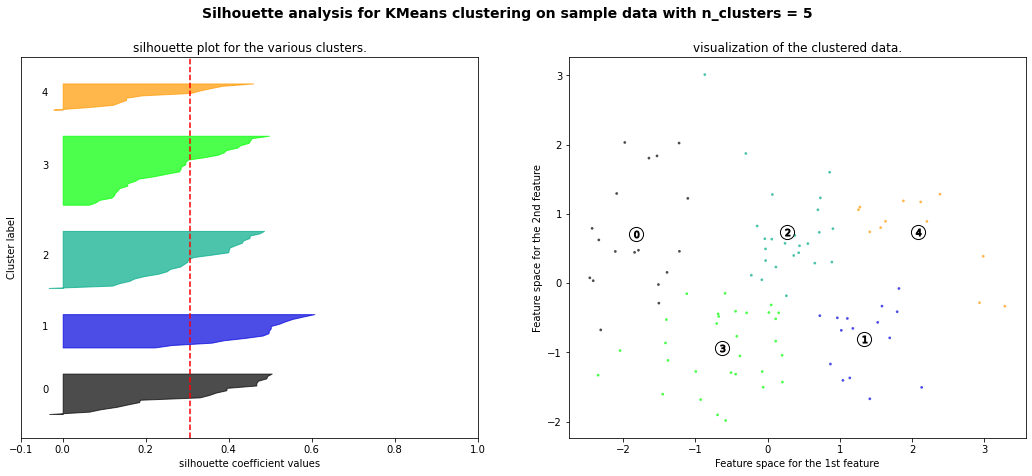

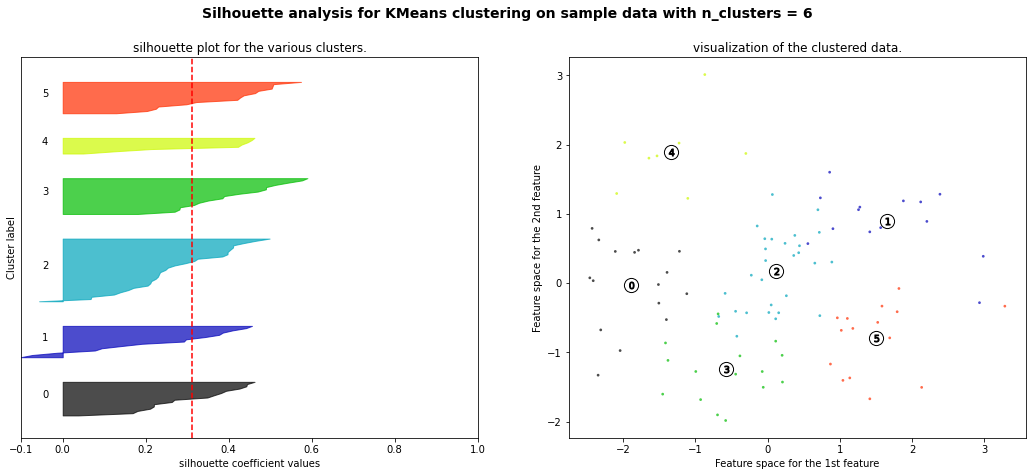

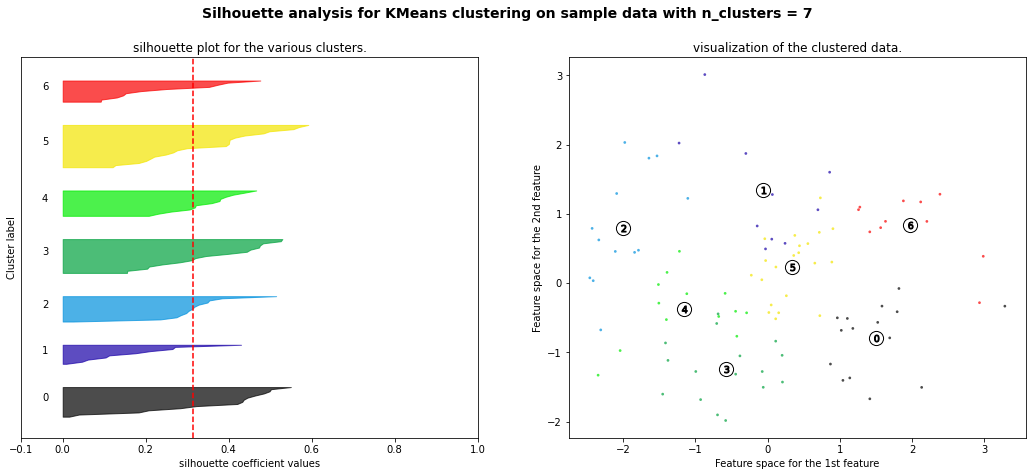

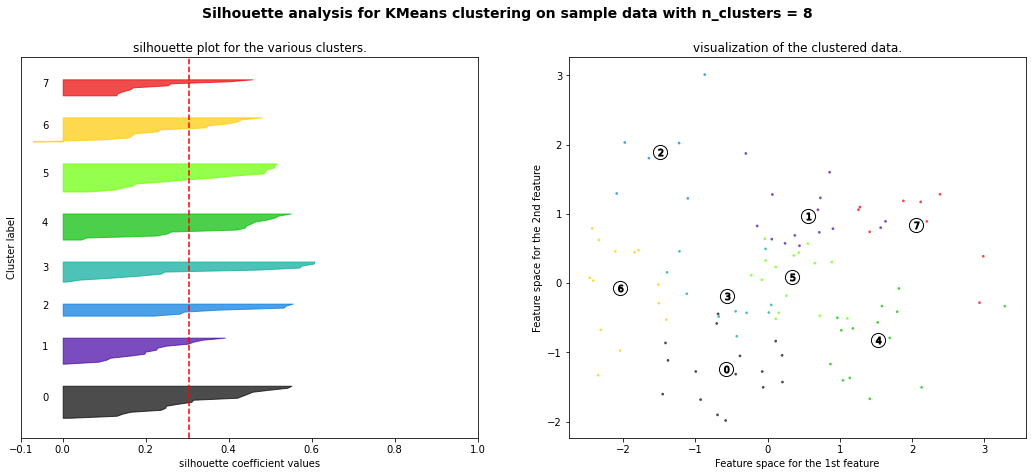

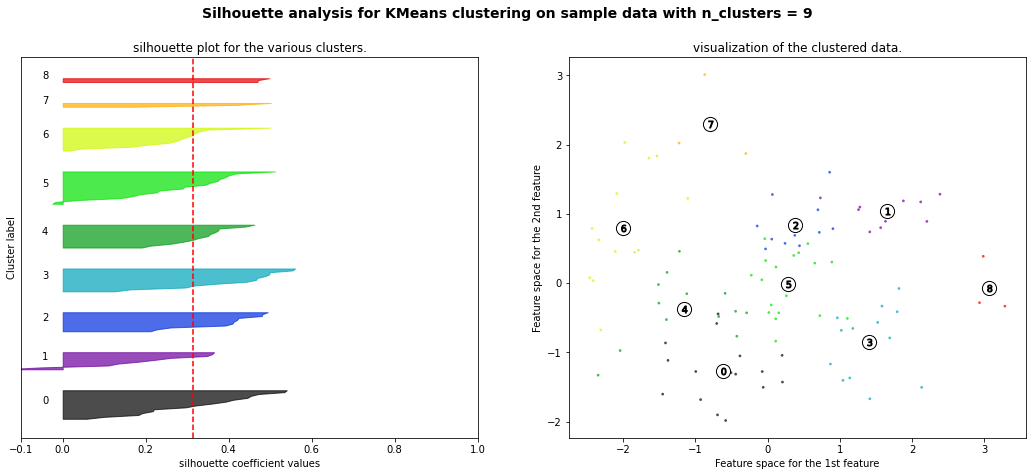

In [ ]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


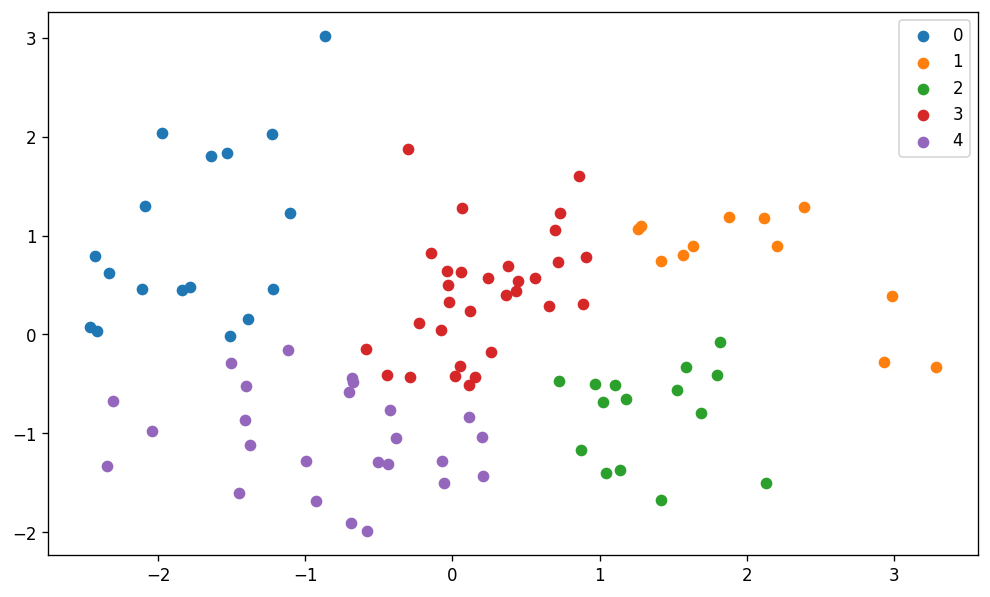

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

### **ML Model - 2  Hierarchicla Clustering** 

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.



The hierarchical clustering technique has two approaches:




 **Agglomerative :** 
>Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.


**Divisive :** 
>Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

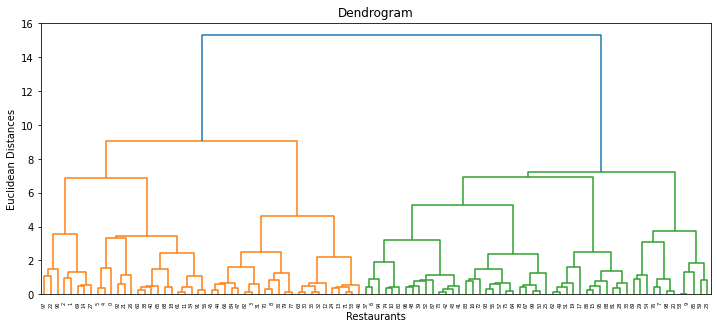

In [ ]:
# Code to find hierarchial clustering and vizualizing dendograms

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2956373115574951
For n_clusters = 3, silhouette score is 0.2248300083366887
For n_clusters = 4, silhouette score is 0.20830889821051732
For n_clusters = 5, silhouette score is 0.24628280178066397
For n_clusters = 6, silhouette score is 0.27021411301776405
For n_clusters = 7, silhouette score is 0.26673247429646685
For n_clusters = 8, silhouette score is 0.28037605252034475
For n_clusters = 9, silhouette score is 0.28706963785796336
For n_clusters = 10, silhouette score is 0.2871341619269206
For n_clusters = 11, silhouette score is 0.2981397628070568
For n_clusters = 12, silhouette score is 0.3129672485485945
For n_clusters = 13, silhouette score is 0.31385473039020595
For n_clusters = 14, silhouette score is 0.3255791969968624
For n_clusters = 15, silhouette score is 0.33513227533507567


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

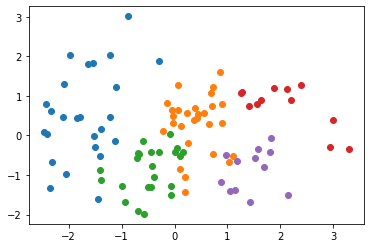

Silhouette Coefficient: 0.246
davies_bouldin_score 1.152


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**KMeans Clustering**
> I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

**Agglomerative Hierarchical Clustering**
> I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

### **ML Model - 3 Sentiment Analysis**

**Linear Discrimination Analysis**

Linear Discriminant analysis is one of the most popular dimensionality reduction techniques used for supervised classification problems in machine learning. It is also considered a pre-processing step for modeling differences in ML and applications of pattern classification.

In [ ]:
#Import pyldavis to visualise
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 28.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


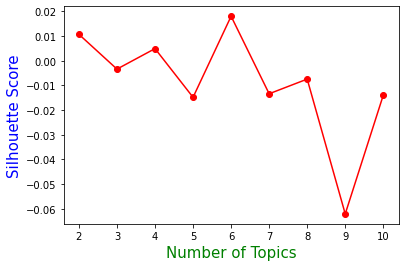

In [ ]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [ ]:
import nltk.corpus

In [ ]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)

lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# ploting the clusters top 30 terms 
lda_pyLDAvis = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
lda_pyLDAvis

AttributeError: ignored

* LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

 So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.





### **ML Model - 4     Logistic Regression**

In [ ]:
#defining function to calculate score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.


The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

In [ ]:
#logisctic regression
from sklearn.linear_model import LogisticRegression



# create and fit the model
clf = LogisticRegression()




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

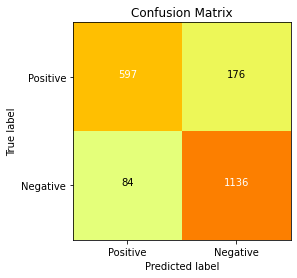

[[ 597  176]
 [  84 1136]]
Metric        Score
---------  --------
ROC AUC    0.851732
Precision  0.865854
Recall     0.931148
F1         0.897314
Accuracy   0.869543


In [ ]:
# Visualizing evaluation Metric Score chart for logistic regression

print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 597 instances are labeled as True Positive (correctly predicted as positive)
* 176 instances are labeled as False Positive (incorrectly predicted as positive)
* 1136 instances are labeled as True Negative (correctly predicted as negative)
* 84 instances are labeled as False Negative (incorrectly predicted as negative)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

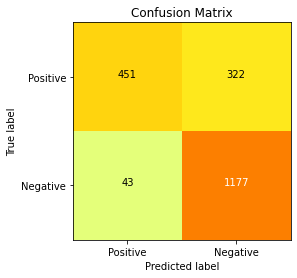

[[ 451  322]
 [  43 1177]]
Metric        Score
---------  --------
ROC AUC    0.774098
Precision  0.78519
Recall     0.964754
F1         0.865759
Accuracy   0.816859


In [ ]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Checking the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

# Predict on the model
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 451 instances are labeled as True Positive (correctly predicted as positive)
* 322 instances are labeled as False Positive (incorrectly predicted as positive)
* 1177 instances are labeled as True Negative (correctly predicted as negative)
* 43 instances are labeled as False Negative (incorrectly predicted as negative)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### **ML Model - 5   XGBoost**

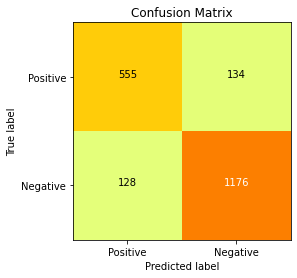

[[ 555  134]
 [ 128 1176]]
Metric        Score
---------  --------
ROC AUC    0.853678
Precision  0.89771
Recall     0.90184
F1         0.89977
Accuracy   0.86854


In [ ]:
# Visualizing evaluation Metric Score chart for XgBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[11:12:03] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.



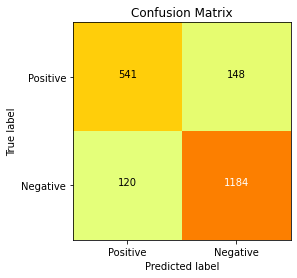

[[ 541  148]
 [ 120 1184]]
Metric        Score
---------  --------
ROC AUC    0.846586
Precision  0.888889
Recall     0.907975
F1         0.898331
Accuracy   0.865529


In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

**Accuracy:** This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

**Precision :** This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

**Recall:** This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

**F1 Score:** This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

**ROC AUC:** This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved. 

Other important discoveries during analysis are - 
* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.
